In [15]:
# Suppress warnings thrown by different packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import datetime as dt

# Set Pandas Options to Display all rows & columns when displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set float places & displayed decimal digits
pd.options.display.float_format = '{:13,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [16]:
# Read the Dataset
df = pd.read_csv(r"C:\Users\Ashis\Desktop\ML Project\Project 1\books_cleaned.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
print('Dataframe Shape :', df.shape,'\n')

Dataframe Shape : (11101, 65) 



In [17]:
# Creating Temporal features for better analysis of the data 

df.publication_date = pd.to_datetime(df.publication_date)
df['year'] = df['publication_date'].dt.year
df['month'] = df['publication_date'].dt.month
df['week'] = df['publication_date'].dt.week
df['decade'] = df.year - (df.year%10)

today = dt.datetime.today().strftime('%Y-%m-%d')

# creating a feature - age of the book
curr_age = pd.to_datetime(today) - pd.to_datetime(df.publication_date.dt.strftime('%Y-%m-%d'))
df['curr_age'] = np.round(curr_age.dt.days/30,0)

df.head(3)

bookID                                              title  \
0   16914                  The Tolkien Fan's Medieval Reader   
1   12224  Streetcar Suburbs: The Process of Growth in Bo...   
2   22128                     Patriots (The Coming Collapse)   

                             authors  average_rating        isbn  \
0                     david e. smith            3.58  1593600119   
1  sam bass warner jr./sam b. warner            3.58   674842111   
2                james wesley rawles            3.63  156384155X   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        400             26                   4   
1         en-US        236             61                   6   
2           eng        342             38                   4   

  publication_date                    publisher  \
0       2004-04-06            Cold Spring Press   
1       2004-04-20     Harvard University Press   
2       1999-01-15  Huntington House Publishers   

                                           raw_title  \
0                  the tolkien fan's medieval reader   
1  streetcar suburbs: the process of growth in bo...   
2                                           patriots   

                       raw_pub                              authors_comb  \
0            cold spring press                        ['david e. smith']   
1     harvard university press  ['sam bass warner jr.', 'sam b. warner']   
2  huntington house publishers                   ['james wesley rawles']   

              author_1       author_2 author_3 author_4 author_5 author_6  \
0       david e. smith            NaN      NaN      NaN      NaN      NaN   
1  sam bass warner jr.  sam b. warner      NaN      NaN      NaN      NaN   
2  james wesley rawles            NaN      NaN      NaN      NaN      NaN   

  author_7 author_8 author_9 author_10 author_11 author_12 author_13  \
0      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
1      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
2      NaN      NaN      NaN       NaN       NaN       NaN       NaN   

  author_14 author_15 author_16 author_17 author_18 author_19 author_20  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_21 author_22 author_23 author_24 author_25 author_26 author_27  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_28 author_29 author_30 author_31 author_32 author_33 author_34  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_35 author_36 author_37 author_38 author_39 author_40 author_41  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_42 author_43 author_44 author_45 author_46 author_47 author_48  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_49 author_50 author_51  year  month  week  decade      curr_age  
0       NaN       NaN       NaN  2004      4    15    2000        242.00  
1       NaN       NaN       NaN  2004      4    17    2000        242.00  
2       NaN       NaN       NaN  1999      1     2    1990        306.00

In [18]:
# Creating a feature for number of authors associated with the books

df['num_authors'] = [len(x.split('/')) for x in df.authors]
df['single_author'] = np.where(df.num_authors==1,1,0)
df['double_author'] = np.where(df.num_authors==2,1,0)
df['triple_author'] = np.where(df.num_authors==3,1,0)
df['multi_author'] = np.where(df.num_authors>3,1,0)

# Creating a feature for total evaluations received for a book as some books have very low reviews 
# which creates more 'uncertainty' in ratings

df['tot_rvws'] = df['ratings_count'] + df['text_reviews_count']

df.head(3)

bookID                                              title  \
0   16914                  The Tolkien Fan's Medieval Reader   
1   12224  Streetcar Suburbs: The Process of Growth in Bo...   
2   22128                     Patriots (The Coming Collapse)   

                             authors  average_rating        isbn  \
0                     david e. smith            3.58  1593600119   
1  sam bass warner jr./sam b. warner            3.58   674842111   
2                james wesley rawles            3.63  156384155X   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        400             26                   4   
1         en-US        236             61                   6   
2           eng        342             38                   4   

  publication_date                    publisher  \
0       2004-04-06            Cold Spring Press   
1       2004-04-20     Harvard University Press   
2       1999-01-15  Huntington House Publishers   

                                           raw_title  \
0                  the tolkien fan's medieval reader   
1  streetcar suburbs: the process of growth in bo...   
2                                           patriots   

                       raw_pub                              authors_comb  \
0            cold spring press                        ['david e. smith']   
1     harvard university press  ['sam bass warner jr.', 'sam b. warner']   
2  huntington house publishers                   ['james wesley rawles']   

              author_1       author_2 author_3 author_4 author_5 author_6  \
0       david e. smith            NaN      NaN      NaN      NaN      NaN   
1  sam bass warner jr.  sam b. warner      NaN      NaN      NaN      NaN   
2  james wesley rawles            NaN      NaN      NaN      NaN      NaN   

  author_7 author_8 author_9 author_10 author_11 author_12 author_13  \
0      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
1      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
2      NaN      NaN      NaN       NaN       NaN       NaN       NaN   

  author_14 author_15 author_16 author_17 author_18 author_19 author_20  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_21 author_22 author_23 author_24 author_25 author_26 author_27  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_28 author_29 author_30 author_31 author_32 author_33 author_34  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_35 author_36 author_37 author_38 author_39 author_40 author_41  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_42 author_43 author_44 author_45 author_46 author_47 author_48  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_49 author_50 author_51  year  month  week  decade      curr_age  \
0       NaN       NaN       NaN  2004      4    15    2000        242.00   
1       NaN       NaN       NaN  2004      4    17    2000        242.00   
2       NaN       NaN       NaN  1999      1     2    1990        306.00   

   num_authors  single_author  double_author  triple_author  multi_au

In [19]:
# Creating some useful features to better represent the data
df['langs'] = df.language_code.replace({'en-US' : 'eng', 'en-CA' : 'eng', 'en-GB' : 'eng'})

# Some languages are rare in number, so replacing them with a category 'oth' (Instances < 10)
test = df.groupby('langs')['isbn'].count().reset_index()
rare_lang = test[test.isbn<10].langs.to_list()
df.loc[df.langs.isin(rare_lang), 'langs'] = 'oth'

df['auth_cat'] = np.select([df.single_author==1, df.double_author==1, df.triple_author==1, df.multi_author==1],
                          ['single', 'double', 'triple', 'multiple'])

In [20]:
# Seperate Audiobooks from physical books
df.publisher = df.publisher.str.strip().str.lower()
df.title = df.title.str.strip().str.lower()

df['IsAudio'] = np.where(((df.publisher.str.contains('audio')))  | (df.publisher.str.contains('sound')) | 
                         (df.publisher.str.contains('recorded')) | (df.publisher.str.contains('tantor media')) | 
                         (df.publisher.str.contains('hay house')),1,0)

df['IsAudio'] = np.where(((df.title.str.contains(' cd '))| (df.title.str.contains('audio')) | (df.title.str.contains('radio'))
                          | (df.title.str.contains('cassette')) | (df.title.str.contains('dramati'))|
                          (df.title.str.contains('recorded'))),1,df.IsAudio)

In [21]:
# Creating a 'decadal' world population index for each decade from 1900-2020

pop_idx = {'decade' : [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020],
                    'pop_idx' : [100,109,117,128,141,155,184,225,265,323,374,425,477]}
pop_yr  = pd.DataFrame(pop_idx)
pop_yr.decade = pop_yr.decade.astype('object')

df = df.merge(pop_yr, how='left', on=['decade'])

# Creating a 'decadal' world population literacy index for each decade from 1900-2020

pop_lit = {'decade' : [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020],
                    'lit_idx' : [21,26,32,33,42,36,42,57,68,75,81,84,87]}
lit_yr  = pd.DataFrame(pop_lit)
lit_yr.decade = lit_yr.decade.astype('object')

df = df.merge(lit_yr, how='left', on=['decade'])

# Creating a 'decadal' world global per capita income index for each decade from 1900-2020

pop_gpc = {'decade' : [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020],
                    'gpc_idx' : [100,100,101,121,142,151,198,269,327,372,448,596,778]}
gpc_yr  = pd.DataFrame(pop_gpc)
gpc_yr.decade = gpc_yr.decade.astype('object')

df = df.merge(gpc_yr, how='left', on=['decade'])

df.head(3)

bookID                                              title  \
0   16914                  the tolkien fan's medieval reader   
1   12224  streetcar suburbs: the process of growth in bo...   
2   22128                     patriots (the coming collapse)   

                             authors  average_rating        isbn  \
0                     david e. smith            3.58  1593600119   
1  sam bass warner jr./sam b. warner            3.58   674842111   
2                james wesley rawles            3.63  156384155X   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        400             26                   4   
1         en-US        236             61                   6   
2           eng        342             38                   4   

  publication_date                    publisher  \
0       2004-04-06            cold spring press   
1       2004-04-20     harvard university press   
2       1999-01-15  huntington house publishers   

                                           raw_title  \
0                  the tolkien fan's medieval reader   
1  streetcar suburbs: the process of growth in bo...   
2                                           patriots   

                       raw_pub                              authors_comb  \
0            cold spring press                        ['david e. smith']   
1     harvard university press  ['sam bass warner jr.', 'sam b. warner']   
2  huntington house publishers                   ['james wesley rawles']   

              author_1       author_2 author_3 author_4 author_5 author_6  \
0       david e. smith            NaN      NaN      NaN      NaN      NaN   
1  sam bass warner jr.  sam b. warner      NaN      NaN      NaN      NaN   
2  james wesley rawles            NaN      NaN      NaN      NaN      NaN   

  author_7 author_8 author_9 author_10 author_11 author_12 author_13  \
0      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
1      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
2      NaN      NaN      NaN       NaN       NaN       NaN       NaN   

  author_14 author_15 author_16 author_17 author_18 author_19 author_20  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_21 author_22 author_23 author_24 author_25 author_26 author_27  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_28 author_29 author_30 author_31 author_32 author_33 author_34  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_35 author_36 author_37 author_38 author_39 author_40 author_41  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_42 author_43 author_44 author_45 author_46 author_47 author_48  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_49 author_50 author_51  year  month  week decade      curr_age  \
0       NaN       NaN       NaN  2004      4    15   2000        242.00   
1       NaN       NaN       NaN  2004      4    17   2000        242.00   
2       NaN       NaN       NaN  1999      1     2   1990        306.00   

   num_authors  single_author  double_author  triple_author  multi_author

In [22]:
df.publication_date = pd.to_datetime(df.publication_date)
df.sort_values(by='publication_date', inplace=True)

# Creating more features to test out our Hypotheses - (#Pages, #Ratings, #Text reviews, #Authors, #Publishers, #languages published,
# may be positively correlated to Ratings; Oldness of Books may be positively correlated with Ratings )

today = dt.datetime.today().strftime('%Y-%m-%d')
curr_age = pd.to_datetime(today) - pd.to_datetime(df.publication_date.dt.strftime('%Y-%m-%d'))
df['curr_age'] = np.round(curr_age.dt.days/30,0)

test = df.groupby(['title','average_rating']).agg(books_cnt = ('isbn','nunique'), num_lng_iso = ('language_code','nunique'),
                                                num_publishers = ('publisher','nunique'), chgs_authors = ('authors','nunique'),
                                                num_ratings = ('ratings_count','sum'), num_langs = ('langs','nunique'),
                                                num_txrvws = ('text_reviews_count','sum'), times_published = ('publication_date','nunique'),
                                                oldest_pub_age = ('curr_age','min'), last_pub_age = ('curr_age','max'),
                                               first_pub_lang = ('langs','first'), max_pages = ('num_pages', 'max'),
                                               min_pages = ('num_pages', 'min'), med_pages = ('num_pages', 'median'))
test.reset_index(inplace=True)

df = df.merge(test, how='left', on=['title', 'average_rating'])

# Creating feature to test out ' Total Years in Publication vs Ratings'
df['pub_intvl'] = df.last_pub_age - df.oldest_pub_age

df.head(3)

bookID                                      title  \
0   37134                        consider the lilies   
1   24459                    on duties (de officiis)   
2   25692  agricola / germania / dialogue on oratory   

                                             authors  average_rating  \
0                  iain crichton smith/isobel murray            3.88   
1                marcus tullius cicero/walter miller            3.96   
2  tacitus/maurice hutton/robert maxwell ogilvie/...            3.95   

        isbn language_code  num_pages  ratings_count  text_reviews_count  \
0  753812932           eng        144            332                  33   
1  674990331           eng        448            111                  11   
2  674990390           mul        384             87                   7   

  publication_date                 publisher  \
0       1900-01-01                   polygon   
1       1913-01-01  harvard university press   
2       1914-01-01  harvard university press   

                                   raw_title                   raw_pub  \
0                        consider the lilies                   polygon   
1                                  on duties  harvard university press   
2  agricola / germania / dialogue on oratory  harvard university press   

                                        authors_comb               author_1  \
0           ['iain crichton smith', 'isobel murray']    iain crichton smith   
1         ['marcus tullius cicero', 'walter miller']  marcus tullius cicero   
2  ['tacitus', 'maurice hutton', 'robert maxwell ...                tacitus   

         author_2                author_3         author_4          author_5  \
0   isobel murray                     NaN              NaN               NaN   
1   walter miller                     NaN              NaN               NaN   
2  maurice hutton  robert maxwell ogilvie  e.h. warmington  william peterson   

               author_6 author_7 author_8 author_9 author_10 author_11  \
0                   NaN      NaN      NaN      NaN       NaN       NaN   
1                   NaN      NaN      NaN      NaN       NaN       NaN   
2  michael winterbottom      NaN      NaN      NaN       NaN       NaN   

  author_12 author_13 author_14 author_15 author_16 author_17 author_18  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_19 author_20 author_21 author_22 author_23 author_24 author_25  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_26 author_27 author_28 author_29 author_30 author_31 author_32  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_33 author_34 author_35 author_36 author_37 author_38 author_39  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_40 author_41 author_42 author_43 author_44 author_45 author_46  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_47 author_48 author_49 author_50 author_51  year  month  week decade  \
0       NaN       NaN       NaN       NaN       NaN  1900      1     1   1900   
1       NaN       NaN       NaN       NaN       NaN  1913      1     1   1910   
2       NaN

In [9]:
cols = ['average_rating','language_code', 'num_pages', 'ratings_count', 'text_reviews_count','year', 'month',
       'week', 'decade', 'curr_age', 'num_authors', 'single_author', 'multi_author', 'tot_rvws', 'langs', 'auth_cat', 
        'IsAudio', 'pop_idx', 'lit_idx', 'gpc_idx', 'num_publishers', 'num_ratings', 'num_langs', 'num_txrvws', 
        'times_published', 'oldest_pub_age', 'first_pub_lang', 'med_pages', 'pub_intvl']

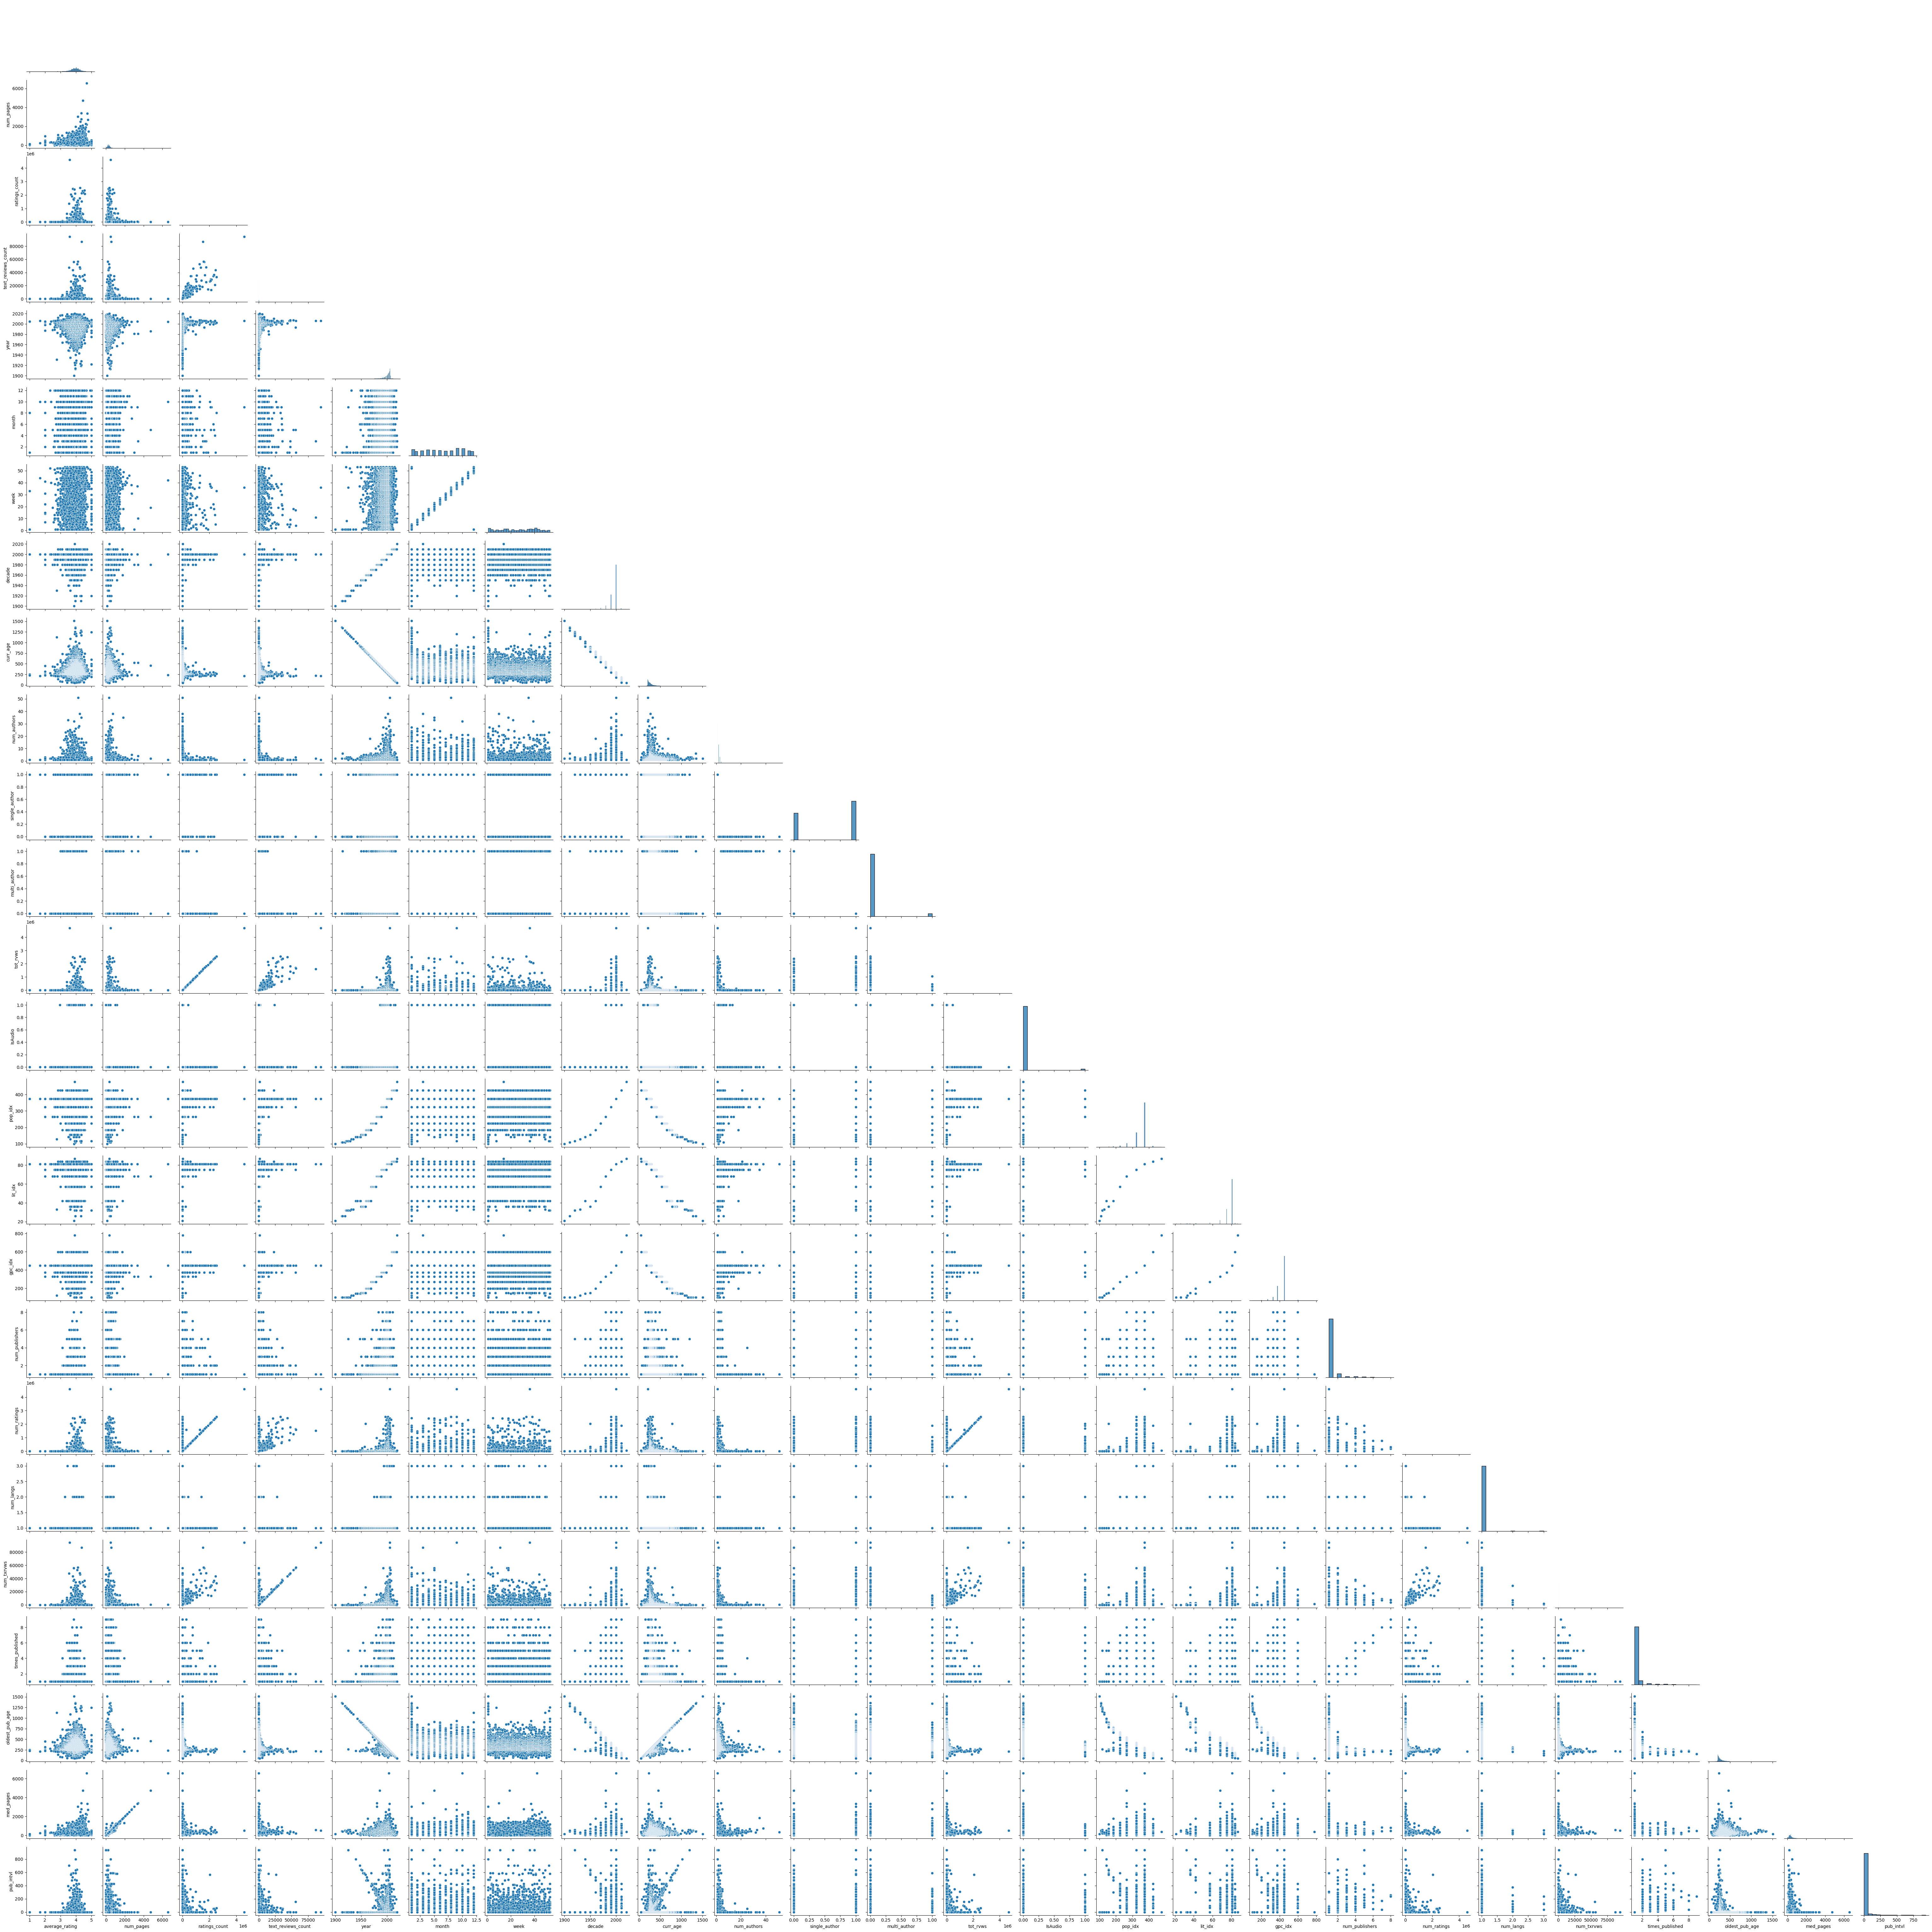

In [10]:
# sns.pairplot(df[cols], corner=True)

In [11]:
# Creating plots to visualize patterns & relations - Bivariate Analysis

fig = px.bar(df.groupby('langs')['average_rating'].mean().reset_index(), x='langs', y='average_rating')
fig.show()

fig = px.bar(df.groupby('auth_cat')['average_rating'].mean().reset_index(), x='auth_cat', y='average_rating')
fig.show()

fig = px.scatter(df[df.num_pages>10], x='num_pages', y='average_rating')
fig.show()

fig = px.scatter(df, x='ratings_count', y='average_rating')
fig.show()

fig = px.scatter(df[df.pub_intvl>0], x='pub_intvl', y='average_rating')
fig.show()

fig = px.scatter(df, x='text_reviews_count', y='average_rating')
fig.show()

fig = px.scatter(df, x='num_publishers', y='average_rating')
fig.show()

fig = px.scatter(df[df.num_authors<=10], x='num_authors', y='average_rating')
fig.show()

fig = px.bar(df.groupby('IsAudio')['average_rating'].mean().reset_index(), x='IsAudio', y='average_rating')
fig.show()

fig = px.bar(df.groupby('IsColl')['average_rating'].mean().reset_index(), x='IsColl', y='average_rating')
fig.show()

fig = px.bar(df.groupby('IsPhil')['average_rating'].mean().reset_index(), x='IsPhil', y='average_rating')
fig.show()

fig = px.bar(df.groupby('HasParts')['average_rating'].mean().reset_index(), x='HasParts', y='average_rating')
fig.show()

fig = px.bar(df.groupby('single_author')['average_rating'].mean().reset_index(), x='single_author', y='average_rating')
fig.show()

KeyError: 'IsColl'

In [24]:
df['IsClass'] = np.where(((df.title.str.contains(' classic'))|(df.publisher.str.contains('classics'))),1,0)
df['IsBio'] = np.where(((df.title.str.contains(' biography'))),1,0)
df['IsAuto'] = np.where(((df.title.str.contains(' autobiography'))),1,0)
df['IsAuBio'] = np.where(((df.IsAuto==1) | (df.IsBio==1)),1,0)
df['IsBuss'] = np.where(((df.title.str.contains(' econom'))| (df.title.str.contains(' management')) |
                        (df.title.str.contains(' trade')) | (df.title.str.contains(' business')) 
                         | (df.title.str.contains(' technology'))| (df.title.str.contains(' enterprise'))),1,0)
df['IsPolit'] = np.where(((df.title.str.contains(' national')) | (df.title.str.contains(' politic'))
                             | (df.title.str.contains(' government')) | (df.title.str.contains(' law')) 
                          | (df.title.str.contains(' civil')) | (df.title.str.contains(' democracy')) |
                          (df.title.str.contains(' cultur')) | (df.title.str.contains(' ethic')) 
                          | (df.title.str.contains(' moral')) | (df.title.str.contains(' war'))),1,0)
# df['IsClim'] = np.where((df.title.str.contains(' climate')) | (df.title.str.contains(' weather')) 
#                         | (df.title.str.contains(' global warming')),1,0)
df['IsPhil'] = np.where(((df.title.str.contains(' philosophy')) | (df.title.str.contains(' inquiry '))),1,0)
df['IsHist'] = np.where(((df.title.str.contains(' histor'))),1,0)
df['HasStories'] = np.where((df.title.str.contains(' stories') | (df.title.str.contains(' tales '))
                             | (df.title.str.contains(' fables'))),1,0)
df['IsAntho'] = np.where(((df.title.str.contains(' anthology'))),1,0)
df['IsColl'] = np.where(((df.title.str.contains(' collection')) | (df.title.str.contains(' selected')) | 
                         (df.title.str.contains(' books\W')) | (df.title.str.contains(' anthology')) | 
                         (df.title.str.contains(' articles'))| (df.title.str.contains(' essays')) | 
                         (df.title.str.contains(' novels')) | 
                         (df.title.str.contains(' omnibus'))),1,0)
df['IsPlay'] = np.where(((df.title.str.contains(' plays'))),1,0)
df['IsPoem'] = np.where(((df.title.str.contains(' poems')) | (df.title.str.contains(' verse'))),1,0)

df['HasParts'] = np.nan
df['HasParts'] = [((re.search("(vol)\D+\d", x)) or (re.search("#\d", x))) for x in df.title.astype('str')]

df['HasParts'] = np.where(((df.title.str.contains(' tome'))),1,df.HasParts)
df.HasParts = np.where(df.HasParts.isna(),0,1)

df.head(3)

bookID                                      title  \
0   37134                        consider the lilies   
1   24459                    on duties (de officiis)   
2   25692  agricola / germania / dialogue on oratory   

                                             authors  average_rating  \
0                  iain crichton smith/isobel murray            3.88   
1                marcus tullius cicero/walter miller            3.96   
2  tacitus/maurice hutton/robert maxwell ogilvie/...            3.95   

        isbn language_code  num_pages  ratings_count  text_reviews_count  \
0  753812932           eng        144            332                  33   
1  674990331           eng        448            111                  11   
2  674990390           mul        384             87                   7   

  publication_date                 publisher  \
0       1900-01-01                   polygon   
1       1913-01-01  harvard university press   
2       1914-01-01  harvard university press   

                                   raw_title                   raw_pub  \
0                        consider the lilies                   polygon   
1                                  on duties  harvard university press   
2  agricola / germania / dialogue on oratory  harvard university press   

                                        authors_comb               author_1  \
0           ['iain crichton smith', 'isobel murray']    iain crichton smith   
1         ['marcus tullius cicero', 'walter miller']  marcus tullius cicero   
2  ['tacitus', 'maurice hutton', 'robert maxwell ...                tacitus   

         author_2                author_3         author_4          author_5  \
0   isobel murray                     NaN              NaN               NaN   
1   walter miller                     NaN              NaN               NaN   
2  maurice hutton  robert maxwell ogilvie  e.h. warmington  william peterson   

               author_6 author_7 author_8 author_9 author_10 author_11  \
0                   NaN      NaN      NaN      NaN       NaN       NaN   
1                   NaN      NaN      NaN      NaN       NaN       NaN   
2  michael winterbottom      NaN      NaN      NaN       NaN       NaN   

  author_12 author_13 author_14 author_15 author_16 author_17 author_18  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_19 author_20 author_21 author_22 author_23 author_24 author_25  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_26 author_27 author_28 author_29 author_30 author_31 author_32  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_33 author_34 author_35 author_36 author_37 author_38 author_39  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_40 author_41 author_42 author_43 author_44 author_45 author_46  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

  author_47 author_48 author_49 author_50 author_51  year  month  week decade  \
0       NaN       NaN       NaN       NaN       NaN  1900      1     1   1900   
1       NaN       NaN       NaN       NaN       NaN  1913      1     1   1910   
2       NaN

In [25]:
# Saving the cleaned file to the project directory
df.to_csv(r"C:\Users\Ashis\Desktop\ML Project\Project 1\books_features_enhanced.csv")